In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Getting training data

In [2]:
dfx=pd.read_csv('/content/linearX.csv')
dfy=pd.read_csv('/content/linearY.csv')
x=dfx.values
y=dfy.values
x=x.reshape((-1,))
y=y.reshape((-1,))
print(x.shape)
print(y.shape)

(99,)
(99,)


Visualising and Preprocessing

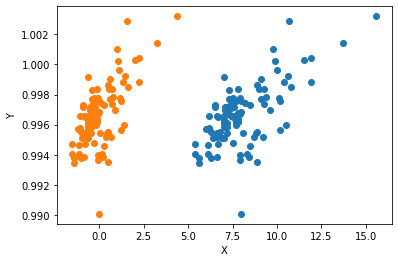

In [3]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X,Y)
plt.show()


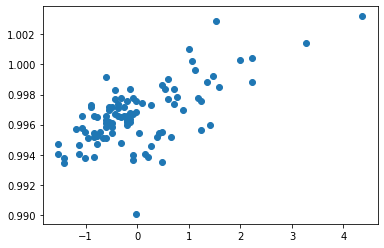

In [4]:
plt.scatter(X,Y)
plt.show()

Gradient Descent Algorithm

We start with a random theta,repeat until converge and update theta according to the rule

In [0]:
def hypothesis(x,theta):
  return theta[0]+theta[1]*x



In [0]:
def error(X,Y,theta):
  m=x.shape[0]  
  error=0
  for i in range(m):
    hx=hypothesis(X[i],theta)
    error+=(hx-Y[i])**2
  return error


In [0]:
def gradient(X,Y,theta):
  grad =np.zeros((2,))
  m=X.shape[0]
  for i in range(m):
    hx=hypothesis(X[i],theta)
    grad[0]+=(hx-Y[i])
    grad[1]+=(hx-Y[i])*X[i]
  return grad


In [0]:
 #The algorithm
def gradientDescent(X,Y,learning_rate=0.001):
   theta=np.array([-2.0,0.0])
   itr=0
   max_itr=100
   error_list=[]
   theta_list=[]
   while(itr<=max_itr):
     grad=gradient(X,Y,theta)
     e=error(X,Y,theta)
     error_list.append(e)
     theta_list.append((theta[0],theta[1]))
     theta[0] = theta[0] - learning_rate*grad[0]
     theta[1] = theta[1] - learning_rate*grad[1]
     itr+=1
   return theta,error_list,theta_list


In [0]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

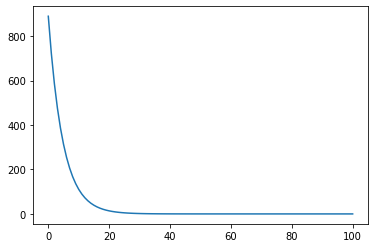

In [26]:
plt.plot(error_list)
plt.show()

In [27]:
print(final_theta)

[0.996554  0.0013579]


In [28]:
### Plot the line for testing data

xtest = np.linspace(-2,6,10)
print(xtest)


[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


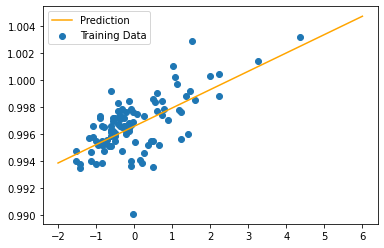

In [29]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()